In [1]:
library('caret')
set.seed(1)

Loading required package: lattice
Loading required package: ggplot2


In [2]:
data=read.csv("./vital.csv")
index <- createDataPartition(data$Vital.Status, p=0.75, list=FALSE)
trainSet <- data[ index,]
testSet <- data[-index,]

In [3]:
#Defining the training controls for multiple models
fitControl <- trainControl(
  method = "cv",
  number = 5,
savePredictions = 'final',
classProbs = T)

#Defining the predictors and outcome
predictors<-c(2:41)
outcomeName<-'Vital.Status'

In [4]:
#Training the Logistic regression model
model_lr<-train(trainSet[,predictors],trainSet[,outcomeName],method='glm',trControl=fitControl,tuneLength=3)

#Predicting using knn model
testSet$pred_lr<-predict(object = model_lr,testSet[,predictors])

#Checking the accuracy of the random forest model
confusionMatrix(testSet$Vital.Status,testSet$pred_lr)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

Confusion Matrix and Statistics

          Reference
Prediction DECEASED LIVING
  DECEASED        0      1
  LIVING          2     16
                                          
               Accuracy : 0.8421          
                 95% CI : (0.6042, 0.9662)
    No Information Rate : 0.8947          
    P-Value [Acc > NIR] : 0.8676          
                                          
                  Kappa : -0.0755         
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 0.00000         
            Specificity : 0.94118         
         Pos Pred Value : 0.00000         
         Neg Pred Value : 0.88889         
             Prevalence : 0.10526         
         Detection Rate : 0.00000         
   Detection Prevalence : 0.05263         
      Balanced Accuracy : 0.47059         
                                          
       'Positive' Class : DECEASED        
                                          

In [5]:
overall_lr  <- confusionMatrix(testSet$Vital.Status,testSet$pred_lr)
print(paste(paste("Overall accuracy is", round(overall_lr$overall[1],3)*100),"%"))

[1] "Overall accuracy is 84.2 %"


In [6]:
#Training the lda model
model_lda<-train(trainSet[,predictors],trainSet[,outcomeName],method='lda',trControl=fitControl,tuneLength=3)

#Predicting using knn model
testSet$pred_lda<-predict(object = model_lda,testSet[,predictors])

#Checking the accuracy of the random forest model
confusionMatrix(testSet$Vital.Status,testSet$pred_lda)

Confusion Matrix and Statistics

          Reference
Prediction DECEASED LIVING
  DECEASED        0      1
  LIVING          2     16
                                          
               Accuracy : 0.8421          
                 95% CI : (0.6042, 0.9662)
    No Information Rate : 0.8947          
    P-Value [Acc > NIR] : 0.8676          
                                          
                  Kappa : -0.0755         
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 0.00000         
            Specificity : 0.94118         
         Pos Pred Value : 0.00000         
         Neg Pred Value : 0.88889         
             Prevalence : 0.10526         
         Detection Rate : 0.00000         
   Detection Prevalence : 0.05263         
      Balanced Accuracy : 0.47059         
                                          
       'Positive' Class : DECEASED        
                                          

In [7]:
overall_lda  <- confusionMatrix(testSet$Vital.Status,testSet$pred_lda)
print(paste(paste("Overall accuracy is", round(overall_lda$overall[1],3)*100),"%"))

[1] "Overall accuracy is 84.2 %"


In [8]:
set.seed(3)
#Training the random forest model
model_rrf<-train(trainSet[,predictors],trainSet[,outcomeName],method='RRF',trControl=fitControl,tuneLength=3)

#Predicting using random forest model
testSet$pred_rrf<-predict(object = model_rrf,testSet[,predictors])

#Checking the accuracy of the random forest model
confusionMatrix(testSet$Vital.Status,testSet$pred_rrf)

Confusion Matrix and Statistics

          Reference
Prediction DECEASED LIVING
  DECEASED        0      1
  LIVING          1     17
                                         
               Accuracy : 0.8947         
                 95% CI : (0.6686, 0.987)
    No Information Rate : 0.9474         
    P-Value [Acc > NIR] : 0.9248         
                                         
                  Kappa : -0.0556        
 Mcnemar's Test P-Value : 1.0000         
                                         
            Sensitivity : 0.00000        
            Specificity : 0.94444        
         Pos Pred Value : 0.00000        
         Neg Pred Value : 0.94444        
             Prevalence : 0.05263        
         Detection Rate : 0.00000        
   Detection Prevalence : 0.05263        
      Balanced Accuracy : 0.47222        
                                         
       'Positive' Class : DECEASED       
                                         

In [9]:
overall_rrf <- confusionMatrix(testSet$Vital.Status,testSet$pred_rrf)
print(paste(paste("Overall accuracy is", round(overall_rrf$overall[1],3)*100),"%"))

[1] "Overall accuracy is 89.5 %"


In [10]:
#Predicting the probabilities
testSet$pred_rrf_prob<-predict(object = model_rrf,testSet[,predictors],type='prob')
testSet$pred_lda_prob<-predict(object = model_lda,testSet[,predictors],type='prob')
testSet$pred_lr_prob<-predict(object = model_lr,testSet[,predictors],type='prob')

#Taking average of predictions
testSet$pred_avg<-(testSet$pred_rrf_prob$LIVING+testSet$pred_lda_prob$LIVING+testSet$pred_lr_prob$LIVING)/3

#Splitting into binary classes at 0.5
testSet$pred_avg<-as.factor(ifelse(testSet$pred_avg>0.5,'LIVING','DECEASED'))

In [11]:
#The majority vote
testSet$pred_majority<-as.factor(ifelse(testSet$pred_rrf=='LIVING' & testSet$pred_lda=='LIVING','LIVING',
                                        ifelse(testSet$pred_rrf=='LIVING' & testSet$pred_lr=='LIVING','LIVING',
                                               ifelse(testSet$pred_lda=='LIVING' & testSet$pred_lr=='LIVING','LIVING','DECEASED'))))

In [12]:
#Taking weighted average of predictions
testSet$pred_weighted_avg<-(testSet$pred_rrf_prob$LIVING*0.25)+(testSet$pred_lda_prob$LIVING*0.25)+(testSet$pred_lr_prob$LIVING*0.5)

#Splitting into binary classes at 0.5
testSet$pred_weighted_avg<-as.factor(ifelse(testSet$pred_weighted_avg>0.5,'LIVING','DECEASED'))

In [13]:
#Defining the training control
fitControl <- trainControl(
method = "cv",
number = 10,
savePredictions = 'final', # To save out of fold predictions for best parameter combinantions
classProbs = T # To save the class probabilities of the out of fold predictions
)

#Defining the predictors and outcome
predictors<-c(2:40)
outcomeName<-'Vital.Status'
#Training the random forest model
model_rrf<-train(trainSet[,predictors],trainSet[,outcomeName],method='RRF',trControl=fitControl,tuneLength=3)

model_lda<-train(trainSet[,predictors],trainSet[,outcomeName],method='lda',trControl=fitControl,tuneLength=3)


#Training the logistic regression model
model_lr<-train(trainSet[,predictors],trainSet[,outcomeName],method='glm',trControl=fitControl,tuneLength=3)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning messag

In [14]:
#Predicting the out of fold prediction probabilities for training data
trainSet$OOF_pred_rrf<-model_rrf$pred$LIVING[order(model_rrf$pred$rowIndex)]
trainSet$OOF_pred_lda<-model_lda$pred$LIVING[order(model_lda$pred$rowIndex)]
trainSet$OOF_pred_lr<-model_lr$pred$LIVING[order(model_lr$pred$rowIndex)]

#Predicting probabilities for the test data
testSet$OOF_pred_rrf<-predict(model_rrf,testSet[predictors],type='prob')$LIVING
testSet$OOF_pred_lda<-predict(model_lda,testSet[predictors],type='prob')$LIVING
testSet$OOF_pred_lr<-predict(model_lr,testSet[predictors],type='prob')$LIVING

In [15]:
#Predictors for top layer models 
predictors_top<-c('OOF_pred_rrf','OOF_pred_lda','OOF_pred_lr') 

In [81]:

#GBM as top layer model 
model_gbm<- 
train(trainSet[,predictors_top],trainSet[,outcomeName],method='gbm',trControl=fitControl,tuneLength=3)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

In [82]:
#predict using GBM top layer model
testSet$gbm_stacked<-predict(model_gbm,testSet[,predictors_top])

In [83]:
confusionMatrix(testSet$Vital.Status,testSet$gbm_stacked)

Confusion Matrix and Statistics

          Reference
Prediction DECEASED LIVING
  DECEASED        0      1
  LIVING          1     17
                                         
               Accuracy : 0.8947         
                 95% CI : (0.6686, 0.987)
    No Information Rate : 0.9474         
    P-Value [Acc > NIR] : 0.9248         
                                         
                  Kappa : -0.0556        
 Mcnemar's Test P-Value : 1.0000         
                                         
            Sensitivity : 0.00000        
            Specificity : 0.94444        
         Pos Pred Value : 0.00000        
         Neg Pred Value : 0.94444        
             Prevalence : 0.05263        
         Detection Rate : 0.00000        
   Detection Prevalence : 0.05263        
      Balanced Accuracy : 0.47222        
                                         
       'Positive' Class : DECEASED       
                                         

In [18]:
overall_gbm  <- confusionMatrix(testSet$Vital.Status,testSet$gbm_stacked)
print(paste(paste("Overall accuracy is", round(overall_gbm$overall[1],3)*100),"%"))

[1] "Overall accuracy is 89.5 %"


In [16]:
#Logistic regression as top layer model
model_svmLinear<-
train(trainSet[,predictors_top],trainSet[,outcomeName],method='svmLinear',trControl=fitControl,tuneLength=3)

maximum number of iterations reached 0.0004032486 -0.000403238

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

In [17]:
#predict using logictic regression top layer model
testSet$svm_stacked<-predict(model_svmLinear,testSet[,predictors_top])

In [18]:
confusionMatrix(testSet$Vital.Status,testSet$svm_stacked)

Confusion Matrix and Statistics

          Reference
Prediction DECEASED LIVING
  DECEASED        0      1
  LIVING          0     18
                                          
               Accuracy : 0.9474          
                 95% CI : (0.7397, 0.9987)
    No Information Rate : 1               
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0               
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity :      NA         
            Specificity : 0.94737         
         Pos Pred Value :      NA         
         Neg Pred Value :      NA         
             Prevalence : 0.00000         
         Detection Rate : 0.00000         
   Detection Prevalence : 0.05263         
      Balanced Accuracy :      NA         
                                          
       'Positive' Class : DECEASED        
                                          

In [19]:
overall_svm  <- confusionMatrix(testSet$Vital.Status,testSet$svm_stacked)
print(paste(paste("Overall accuracy is", round(overall_svm$overall[1],3)*100),"%"))

[1] "Overall accuracy is 94.7 %"


In [21]:
algo<-c("GLM","LDA","Random Forest","Stacked-GBM","Stacked-SVM")
accuracy<-c("84.21","84.21","89.47","89.47","94.74")
x <- data.frame("algo" = algo, "accuracy" = accuracy)

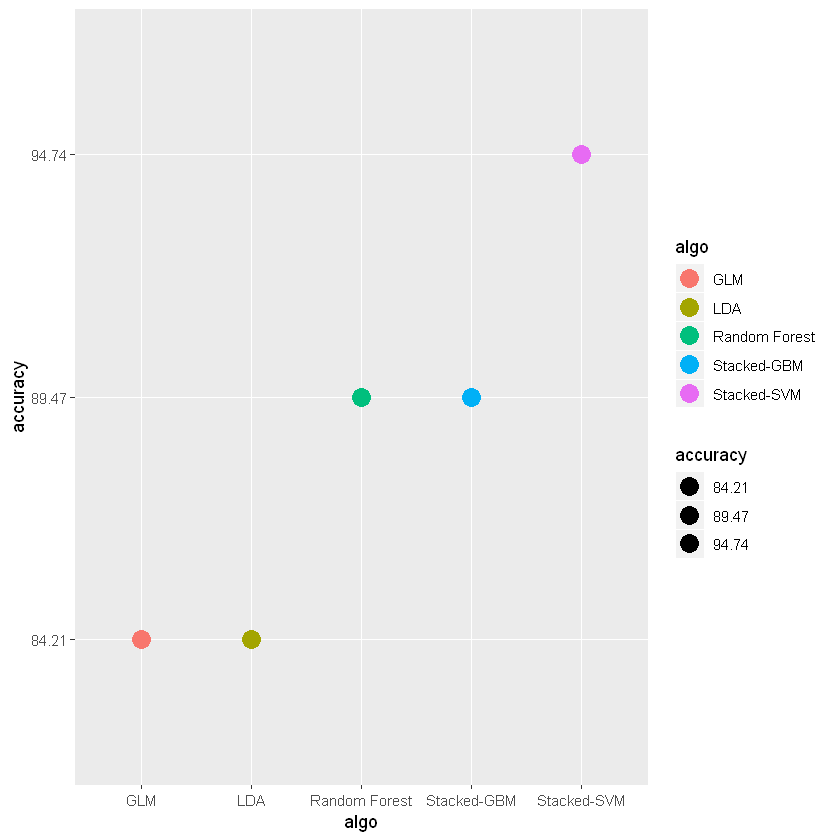

In [22]:
library(ggplot2)
ggplot(x, aes(algo, accuracy, colour = algo , fill=accuracy)) + 
  geom_point(size=5)


In [ ]:
library(shiny)
options(shiny.maxRequestSize = 9*1024^2)

server<-function(input, output) {

 
#Predicting probabilities for the test data
    output$out<-renderText({"Patient will be : "})
    output$tex<-renderTable({
        inFile <- input$file1

    if (is.null(inFile))
      return(NULL)
infile<-read.csv(inFile$datapath)
infile$OOF_pred_rrf<-predict(model_rrf,infile[predictors],type='prob')$LIVING
infile$OOF_pred_lda<-predict(model_lda,infile[predictors],type='prob')$LIVING
infile$OOF_pred_lr<-predict(model_lr,infile[predictors],type='prob')$LIVING
        predictors_top<-c('OOF_pred_rrf','OOF_pred_lda','OOF_pred_lr') 

#GBM as top layer model 
model_svmLinear<-
train(trainSet[,predictors_top],trainSet[,outcomeName],method='svmLinear',trControl=fitControl,tuneLength=3)
        infile$svm_stacked<-predict(model_svmLinear,infile[,predictors_top])
        infile$svm_stacked
        
    })
}
ui<-fluidPage(
  titlePanel("Uploading Files"),
  sidebarLayout(
    sidebarPanel(
      fileInput('file1', 'Choose file to upload',
                accept = c(
                  'text/csv',
                  'text/comma-separated-values',
                  'text/tab-separated-values',
                  'text/plain',
                  '.csv',
                  '.tsv'
                )
      )),
    mainPanel(textOutput('out'),
            tableOutput('tex')
    )
  )

    )

shinyApp(ui, server)


Listening on http://127.0.0.1:6447
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."